# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style()

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

In [9]:
for x in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(knn.score(X_test, y_test))

0.9473684210526315
0.9473684210526315
0.9736842105263158
1.0
0.9736842105263158
0.9210526315789473
0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9473684210526315
0.9736842105263158
0.9736842105263158
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9473684210526315
1.0
0.9736842105263158


In [10]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3)
    print(metrics.accuracy_score(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test)))

0.9555555555555556
0.9555555555555556
1.0
1.0
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
1.0
0.9333333333333333
0.9555555555555556
0.9555555555555556
0.9555555555555556
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9555555555555556
0.9777777777777777
0.9777777777777777
0.9333333333333333


## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

## Практика. Сделайте cross_val_score для KNN

In [11]:
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

## Практика. Подберите оптимальное количество соседей на основе cross_val_score

C:\Users\Ирина Гупта\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'cross_val_score / n_neighbors')

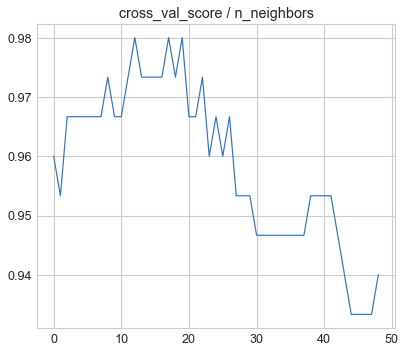

In [24]:
res = []
for i in list(range(1, 50)):
    model = KNeighborsClassifier(n_neighbors=i)
    res.append(cross_val_score(model, X, y, cv=10).mean())
sns.lineplot(range(len(res)), res)
plt.title('cross_val_score / n_neighbors')

## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [32]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [33]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [34]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [35]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.006300425529479981
std_fit_time : 0.00707216552915445
mean_score_time : 0.010700583457946777
std_score_time : 0.007001000697762099
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.05333333333333332
rank_test_score : 24


In [36]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

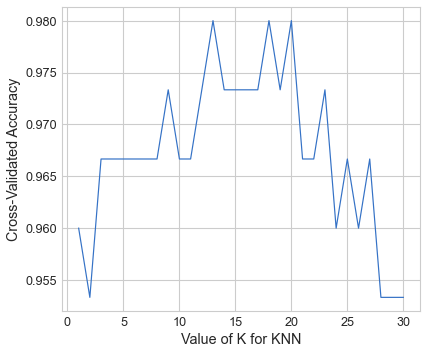

In [37]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [38]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Практика. Постройте confusion_matrix для лучшего estimator'а

In [39]:
from sklearn.metrics import confusion_matrix

In [41]:
pred = grid.best_estimator_.predict(X)
c_m = confusion_matrix(y, pred)
c_m

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

## Конец практики

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно

In [48]:
param_grid = {'n_neighbors':list(range(1,30)),
              'weights':['uniform', 'distance']}
knn = KNeighborsClassifier
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)


TypeError: Cannot clone object '<class 'sklearn.neighbors._classification.KNeighborsClassifier'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
print(grid.best_score_)
print(grid_best_estimator_)

## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [43]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [51]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.9809523809523809
0.9333333333333333


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [57]:
from sklearn.datasets import load_digits
import numpy as np

In [54]:
data = load_digits()

In [55]:
X, y = data['data'], data['target']

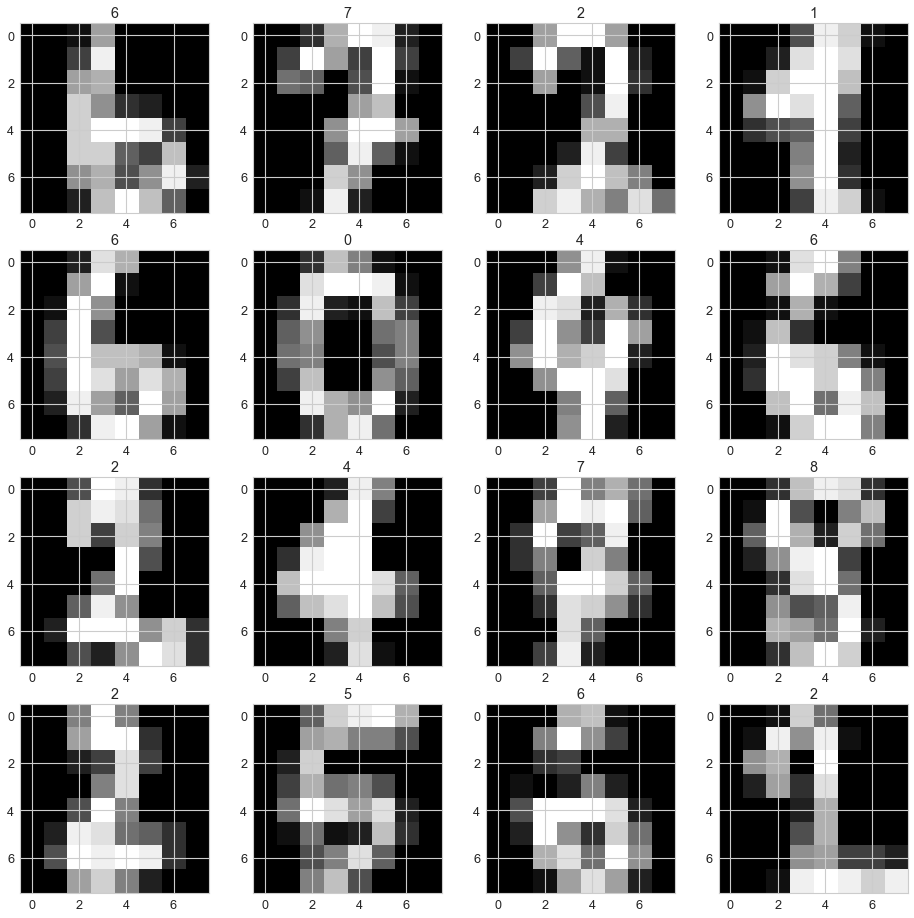

In [58]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()


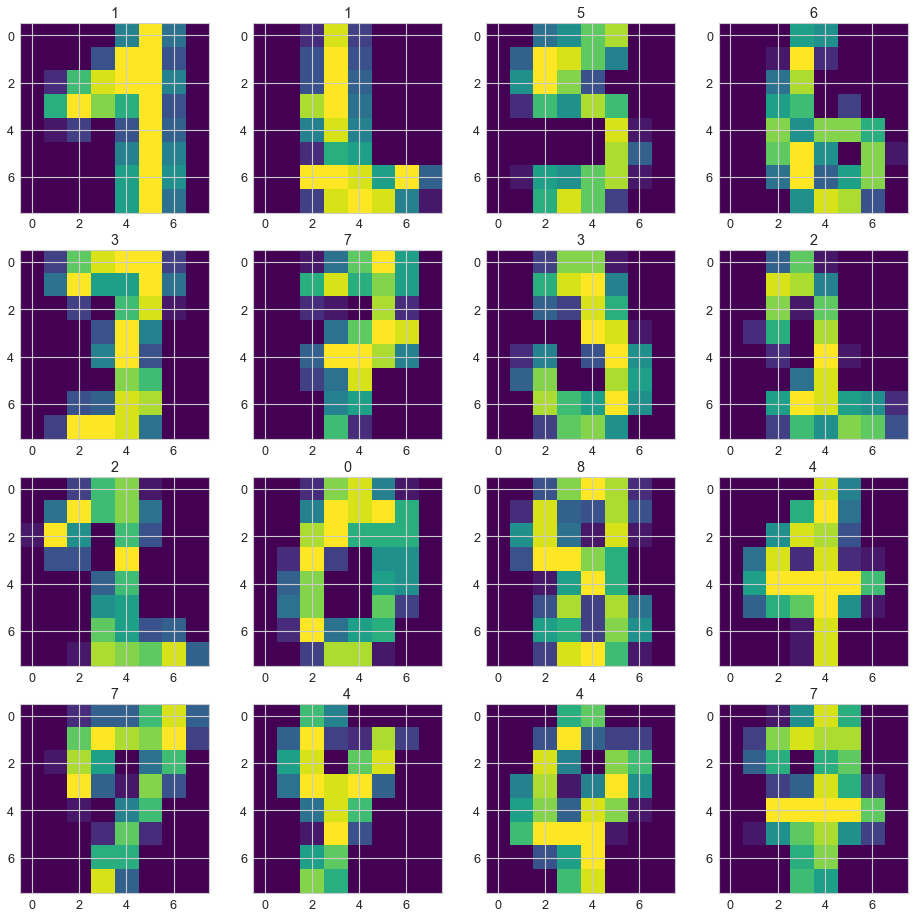

In [59]:
# Уберем заданный цвет: cmap='gray'

fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8))
        plt.title(y[img])
plt.show()


In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

In [80]:
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'n_estimators': list(range(5, 50)),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 10)),
    'min_samples_split': list(range(1, 10)),
    'min_samples_leaf': list(range(1, 10))
}
rfc = RandomizedSearchCV(RandomForestClassifier(), model_params, cv=10, verbose=2, n_jobs=-1)
rfc.fit(X_train, y_train)

print(rfc.score(X_valid, y_valid))
print(rfc.best_score_)
print(rfc.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s


0.9555555555555556
0.9499174436674437
{'n_estimators': 19, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'entropy'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


In [83]:
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 10)),
    'min_samples_split': list(range(1, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}
dtc = RandomizedSearchCV(DecisionTreeClassifier(), model_params, cv=10, verbose=2, n_jobs=-1)
dtc.fit(X_train, y_train)

print(dtc.score(X_valid, y_valid))
print(dtc.best_score_)
print(dtc.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7777777777777778
0.7654865967365968
{'splitter': 'best', 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}


[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [92]:
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'n_neighbors': list(range(1, 10)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1, 10))
}
knn = RandomizedSearchCV(KNeighborsClassifier(), model_params, cv=10, verbose=2, n_jobs=-1)
knn.fit(X_train, y_train)

print(dtc.score(X_valid, y_valid))
print(dtc.best_score_)
print(dtc.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s


0.7777777777777778
0.7654865967365968
{'splitter': 'best', 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


In [70]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifie
abc.fit(X_train, y_train)
print(abc.score(X_valid, y_valid))

0.9666666666666667


In [72]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_valid, y_valid))

0.9666666666666667


# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)